(1.1) K-Nearest Neighbor Implementation using Library

[1]


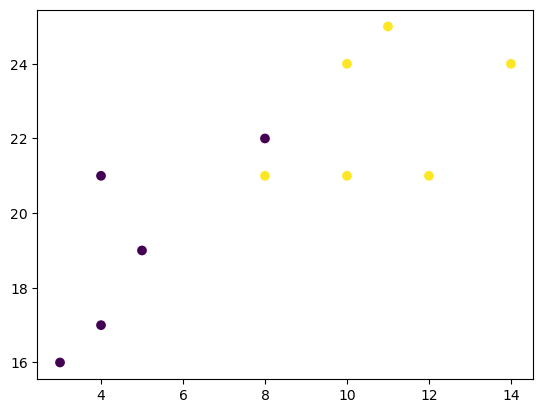

In [88]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
def KNN_implementation():
    x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
    y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
    classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
    
    # plt.scatter(x, y, c=classes)
    # plt.show()

    sample_data  = list(zip(x,y))
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(sample_data, classes)

    new_data = [(8,21)]
    prediction = knn.predict(new_data)
    print(prediction)

    plt.scatter(x + [new_data[0][0]], y + [new_data[0][1]], c=classes + [prediction[0]])

KNN_implementation()

(1.2) K-NN Implementation from Scratch

In [89]:
import numpy as np
from sklearn.metrics import DistanceMetric

# @ Creating a KNN class from scratch requires the following steps: initilization, fit, distance metric selection, prediction
class my_KNN:
    def __init__(self, k=3):
        # @ Store the k value as given
        self.k = k

    def fit(self, X, Y):
        self.X_train =  np.array(X)
        self.y_train = np.array(Y)
        
    def distance_metric(self, x1, x2):
        # @ Selecting Euclidean as a distance metric
        return np.sqrt(np.sum((x1-x2)**2))
        # self.metric.pairwise(X,Y)
        # OR alternatively
        # self.metric = DistanceMetric.get_metric("euclidean")
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self,new_X):
        distances = [self.distance_metric(new_X, x_train) for x_train in self.X_train]
        k_ids = np.argsort(distances)[:self.k]
        # print(k_ids)
        k_nearest = [self.y_train[i] for i in k_ids]     
        most_common = np.bincount(k_nearest).argmax()
        return most_common   
    
X = [[4], [5], [10], [4], [3], [11], [14], [8], [10], [12]]  # Features (X)
Y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]  # These are not used in classification, but useful for context
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Target classes (to predict)
knn = my_KNN(k=3)
knn.fit(X,classes)
new_data = np.array([[8], [90]])
prediction = knn.predict(new_data)

print(prediction)

[1 1]


(2.1) K-Means from Scratch

In [90]:
import numpy as np
import random
from sklearn.datasets import make_blobs
# Iterate through points:
#   Assign point to mean
# Update mean by shifting it to the average of the items categorized in that cluster so far.

class KMeans:
    def __init__(self, num_cluster, max_iteration):
        self.k = num_cluster
        self.max_iter = max_iteration
    
    def fit(self,X):
        # Random selection of centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace = False)]

        for _ in range(self.max_iter):
            labels = self.assign_labels(X)

            new_centroid = self.update_centroid(X, labels)

            if np.all(self.centroids == new_centroid):
                break

            self.centroids = new_centroid

    def assign_labels(self,X):
        # distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        distances = np.sqrt(np.sum((self.centroids - X[:, np.newaxis])**2, axis = 2))
        return np.argmin(distances, axis=1)
    
    def update_centroid(self, X, labels):
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(self.k)])
        return new_centroids
    
# make blobs generates fake data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(num_cluster=4, max_iteration = 20)

kmeans.fit(X)

labels = kmeans.assign_labels(X)
print("Cluster Assignments:", labels)
print("Final Centroids:", kmeans.centroids)

# import plotly.express as px
# fig = px.scatter(X[:, 0], X[:, 1], color=labels)
# fig.show() # visualize

Cluster Assignments: [0 0 1 2 0 3 1 3 1 1 1 3 1 1 0 1 0 2 1 1 1 1 3 0 1 0 0 2 3 1 1 1 0 1 0 1 0
 3 0 2 3 1 0 2 1 1 0 2 0 3 3 0 0 1 0 2 0 1 2 1 0 3 3 0 0 2 2 0 0 1 3 0 0 1
 1 0 0 2 1 3 1 1 0 1 3 0 0 1 3 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 3 0 3
 1 1 1 1 3 0 2 0 2 2 3 1 0 0 0 0 1 0 0 1 1 1 1 1 2 3 0 1 0 1 1 0 1 2 2 3 1
 3 1 1 0 3 0 1 2 3 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 3 1 3 3 0 1 0 3 2
 0 3 1 2 2 0 0 2 0 2 2 3 3 1 0 1 1 2 2 1 2 0 0 2 1 1 0 3 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 3 3 0 2 0 0 0 3 3 1 0 2 3 2 0 3 0 2 0 3 3 0 2 1 0
 1 1 1 0 1 3 2 0 3 3 1 1 3 2 3 0 0 0 1 1 1 2 2 3 2 0 3 0 3 2 0 1 2 3 1 0 1
 2 1 0 0]
Final Centroids: [[-6.88387179 -6.98398415]
 [-2.63323268  9.04356978]
 [ 4.01992918  2.38809341]
 [ 5.50395815  1.617687  ]]


(2.2) KMeans from library

(3.1) SVMs Implementation from Scratch

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)
kmeans.labels_
kmeans.cluster_centers_

c:\Users\alara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 4.60840443,  2.16998192],
       [-2.70292301,  8.89011496]])

In [94]:
class SVM:
    def __init__(self, learning_rate, lambda_param, n_iters):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Shape in row, col format
        n_samples, n_features = X.shape
        # if y values are less than or equal to 0, return -1 else +1
        selected_y = np.where(y <= 0, -1, 1)

        # initilize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for id, x_val in enumerate(X):
                
                condition = (selected_y[id] * (np.dot(x_val, self.w) - self.b) >= 1)

                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(selected_y[id], x_val))
                    self.b -= self.lr * selected_y[id]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
# plt.show()

svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X,y)

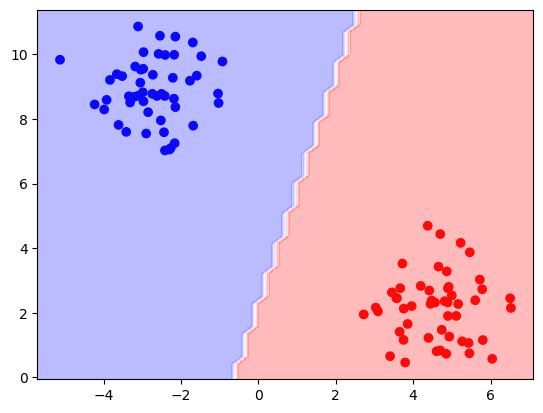

[1. 1.]


In [95]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, svm)

new_samples = np.array([[0, 0], [4, 4]])
predictions = svm.predict(new_samples)
print(predictions)

(3.2) SVM from library

In [96]:
from sklearn.svm import SVC

# Train SVM using Scikit-learn
clf = SVC(kernel='linear')
clf.fit(X, y)

# Compare predictions
print(clf.predict(new_samples))

[1 1]
